In [34]:
# Classification Results

In [35]:
# Load Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [36]:
# Data File
df1 = pd.read_csv("ClassificationData.csv")
display(df1)

,RMSE_pos,RMSE_vel,Features
0,0.014328,0.204391,1.0
1,0.014328,0.204391,1.0
2,0.014328,0.204391,1.0
3,0.014328,0.204391,1.0
4,0.014328,0.204391,1.0
...,...,...,...
91,0.014328,0.204391,10.0
92,0.014328,0.204391,10.0
93,0.014328,0.204391,10.0
94,0.014328,0.204391,10.0


In [37]:
# Data File to Numpy
df1_n = df1.to_numpy()

In [38]:
display(df1_n)

array([[ 0.01432783,  0.20439147,  1.        ],
       [ 0.01432783,  0.20439147,  1.        ],
       [ 0.01432783,  0.20439147,  1.        ],
       [ 0.01432783,  0.20439147,  1.        ],
       [ 0.01432783,  0.20439147,  1.        ],
       [ 0.01432783,  0.20439147,  1.        ],
       [ 0.01432783,  0.20439147,  1.        ],
       [ 0.01432783,  0.20439147,  1.        ],
       [ 0.01432783,  0.20439147,  1.        ],
       [ 0.01432783,  0.20439147,  1.        ],
       [ 0.01432783,  0.20439147,  2.        ],
       [ 0.01432783,  0.20439147,  2.        ],
       [ 0.01432783,  0.20439147,  2.        ],
       [ 0.01432783,  0.20439147,  2.        ],
       [ 0.01432783,  0.20439147,  2.        ],
       [ 0.01432783,  0.20439147,  2.        ],
       [ 0.01432783,  0.20439147,  2.        ],
       [ 0.01432783,  0.20439147,  2.        ],
       [ 0.01432783,  0.20439147,  2.        ],
       [ 0.01432783,  0.20439147,  2.        ],
       [ 0.01432783,  0.20439147,  3.   

In [39]:
# Scale the Data from 0 to 1 (Normalized Position and Velocity)
X = df1_n[:,0:2]
scaler = MinMaxScaler()
Xnorm = scaler.fit_transform(X)

In [40]:
# Put back to DataFrame for plot consturction
df_data = np.concatenate((Xnorm, df1_n[:,2].reshape(-1,1)), axis = 1)
df2 = pd.DataFrame(df_data, columns = ['Normalized Pos', 'Normalized Vel', 'Features'])
display(df2)

,Normalized Pos,Normalized Vel,Features
0,0.591172,0.456157,1.0
1,0.418593,0.642571,1.0
2,0.404236,0.526559,1.0
3,0.277673,0.558409,1.0
4,0.231855,0.565641,1.0
...,...,...,...
91,0.219162,0.573395,10.0
92,0.199274,0.564239,10.0
93,0.187931,0.569236,10.0
94,0.173687,0.576433,10.0


In [41]:
# Running K means
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(Xnorm)
km4 = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(Xnorm)

C:\Users\calvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\calvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


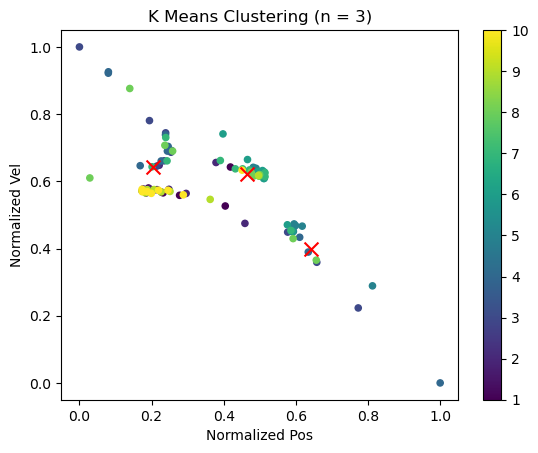

In [42]:
# Plot KMeans:
cluster = kmeans.cluster_centers_
df2.plot.scatter(x = 'Normalized Pos', y = 'Normalized Vel', c = df2['Features'], cmap='viridis')
plt.scatter(cluster[0][0], cluster[0][1], color='red', marker='x', s=100)
plt.scatter(cluster[1][0], cluster[1][1], color='red', marker='x', s=100)
plt.scatter(cluster[2][0], cluster[2][1], color='red', marker='x', s=100)
plt.title("K Means Clustering (n = 3)")
plt.show()

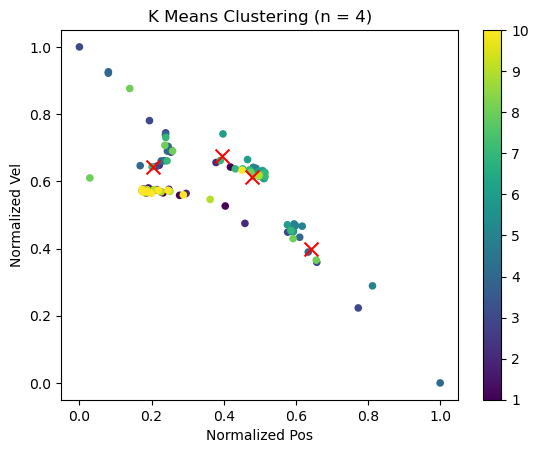

In [43]:
# Plot KMeans:
cluster = km4.cluster_centers_
df2.plot.scatter(x = 'Normalized Pos', y = 'Normalized Vel', c = df2['Features'], cmap='viridis')
plt.scatter(cluster[0][0], cluster[0][1], color='red', marker='x', s=100)
plt.scatter(cluster[1][0], cluster[1][1], color='red', marker='x', s=100)
plt.scatter(cluster[2][0], cluster[2][1], color='red', marker='x', s=100)
plt.scatter(cluster[3][0], cluster[3][1], color='red', marker='x', s=100)
plt.title("K Means Clustering (n = 4)")
plt.show()